# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

img_path = 'data/lena.png'
img = cv2.imread(img_path)

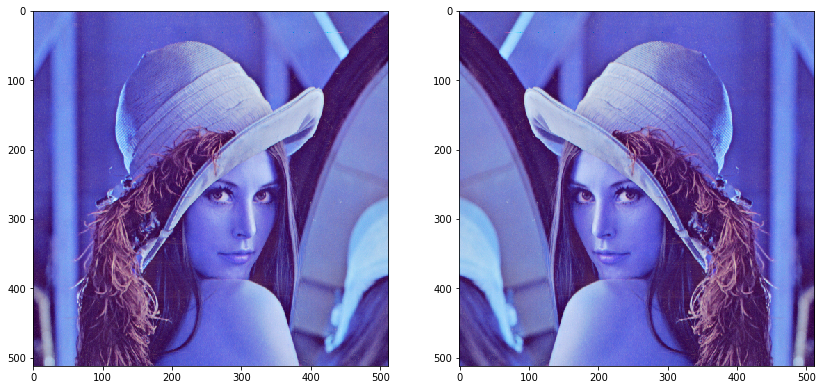

In [3]:
# 水平翻轉 (horizontal)
img_hflip = img[:,::-1,:]
cv2.imshow('img_hflip', img_hflip)
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_hflip)

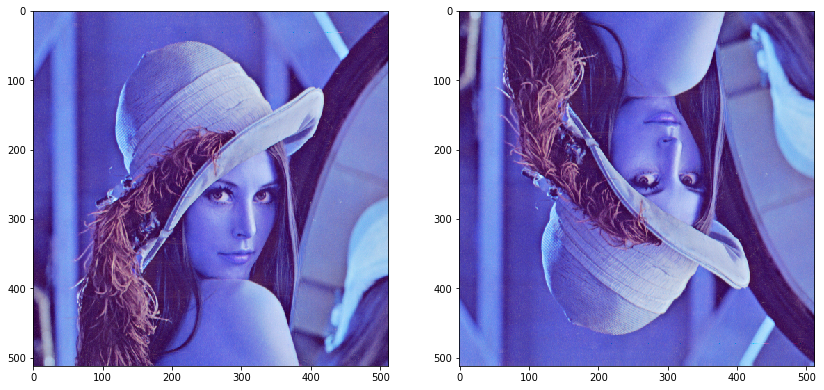

In [4]:
# 垂直翻轉 (vertical)
img_vflip = img[::-1,:,:]
cv2.imshow('img_vflip', img_vflip)
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_vflip)

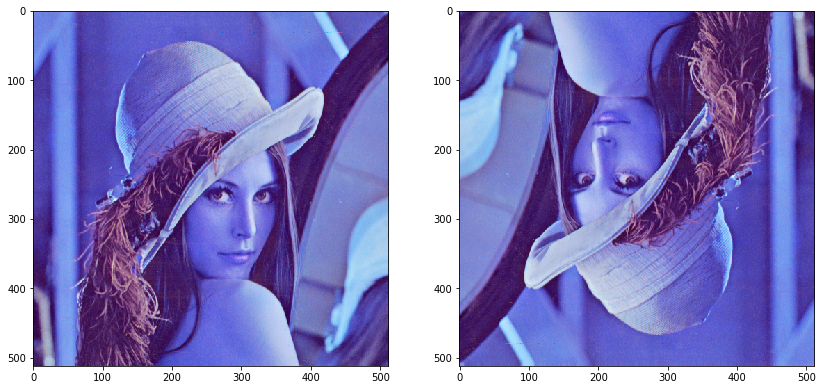

In [5]:
# 水平 + 垂直翻轉
img_hvflip = img[::-1,::-1,:]
cv2.imshow('img_hvflip', img_hvflip)
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_hvflip)

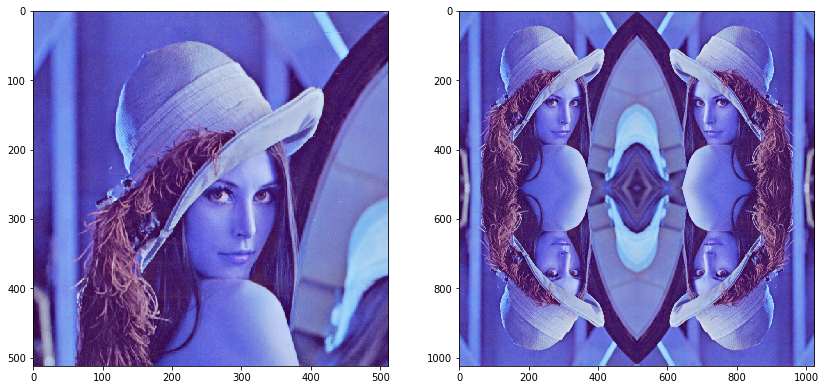

In [6]:
# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip,vflip))
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_flip)

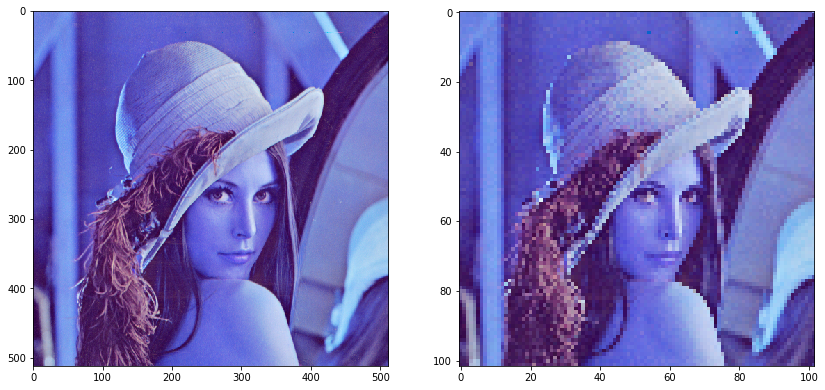

In [9]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)
cv2.imshow('img_resize', img_test)
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_test)

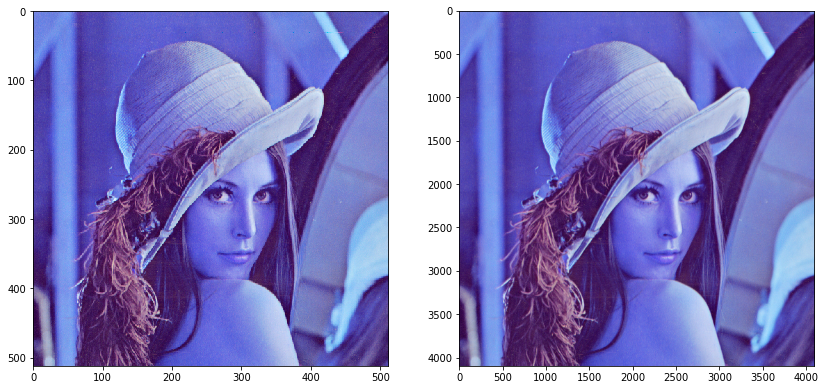

In [10]:
# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
img_test = cv2.resize(img, None, fx=8, fy=8)
cv2.imshow('img_resize', img_test)
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_test)

In [11]:
# 鄰近差值 scale + 計算花費時間
img_test = cv2.resize(img, None, fx=2, fy=2)
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time()-start_time))

INTER_NEAREST zoom cost 0.007290840148925781


In [12]:
# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time()-start_time))

INTER_CUBIC zoom cost 0.014435529708862305


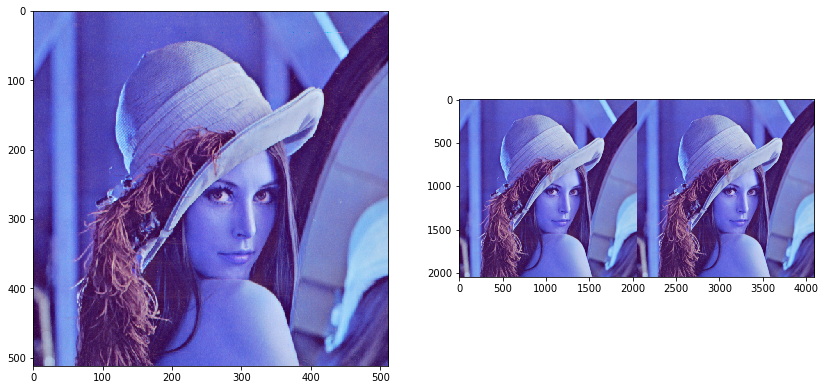

In [13]:
# 組合 + 顯示圖片
img_zoom = np.hstack((img_area_scale, img_cubic_scale))
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_zoom)

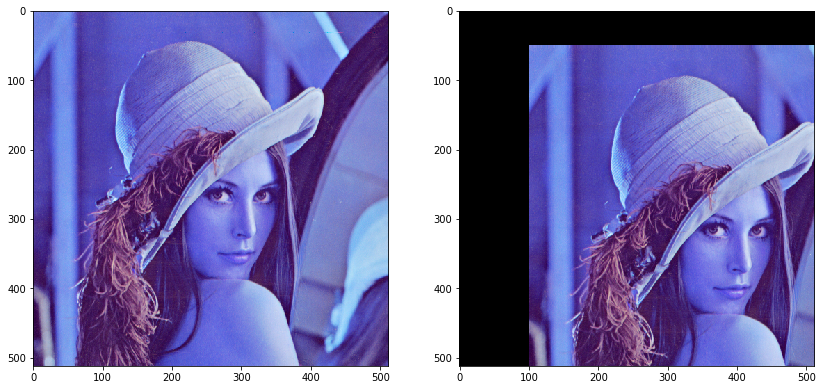

In [14]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 100],
            [0, 1, 50]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(shift_img)

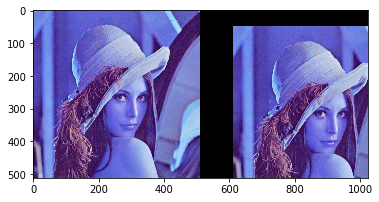

In [16]:
# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))
plt.imshow(img_shift)